
# Delhi Metro Optimization Analysis 🚇

This project analyzes and optimizes the Delhi Metro system by leveraging data science and machine learning. The key areas of focus include:

- Passenger Flow Prediction: Forecasting ridership at different stops and times.
- Train Frequency Optimization: Adjusting schedules based on peak and off-peak demand.
- Smart Fare Pricing: Dynamic pricing based on passenger demand.
- Predictive Maintenance: Assessing infrastructure wear and tear for proactive maintenance.
- Route Analysis & Visualization: Mapping stop locations, route density, and trip distributions.

The analysis incorporates Python, Pandas, Scikit-learn, and Matplotlib, ensuring data-driven decision-making for an efficient and sustainable metro system. 🚀

In [1]:
import math
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

*About the data set*
- Agency: Information about the Delhi Metro Rail Corporation, including name, URL, and contact details.
- Calendar: Service schedules delineating the operation days (weekdays, weekends) and valid dates for these schedules.
- Routes: Details of metro routes, including short and long names, type of route, and descriptions.
- Shapes: Geographical coordinates of routes, providing the precise paths taken by the metro lines.
- Stop Times: Timetables for each trip indicating arrival and departure times at specific stops.
- Stops: Locations of metro stops, including latitude and longitude coordinates.
- Trips: Information linking trips to routes, including details like trip identifiers and associated route IDs.

In [2]:
# Define file paths (assuming CSV format)
data_files = {
    "agency": "agency.txt",
    "calendar": "calendar.txt",
    "routes": "routes.txt",
    "shapes": "shapes.txt",
    "stop_times": "stop_times.txt",
    "stops": "stops.txt",
    "trips": "trips.txt"
}

In [3]:
# Load datasets into pandas DataFrames
dfs = {}
for name, file in data_files.items():
    if os.path.exists(file):
        dfs[name] = pd.read_csv(file, delimiter=',', skipinitialspace=True)  # Assuming comma-separated values
        print(f"Loaded {name}: {dfs[name].shape[0]} rows")
    else:
        print(f"File {file} not found!")

Loaded agency: 1 rows
Loaded calendar: 3 rows
Loaded routes: 36 rows
Loaded shapes: 6643 rows
Loaded stop_times: 128434 rows
Loaded stops: 262 rows
Loaded trips: 5438 rows


# Analysing Dataset files

In [4]:
print(dfs["agency"].head())
print("*******************************************************************************************************************")
dfs["agency"].info()

  agency_id                   agency_name                      agency_url  \
0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   

  agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
0    Asia/Kolkata          NaN           NaN              NaN           NaN  
*******************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   agency_id        1 non-null      object 
 1   agency_name      1 non-null      object 
 2   agency_url       1 non-null      object 
 3   agency_timezone  1 non-null      object 
 4   agency_lang      0 non-null      float64
 5   agency_phone     0 non-null      float64
 6   agency_fare_url  0 non-null      float64
 7   agency_email     0 non-null      float64
dtypes: float

In [5]:
print(dfs["calendar"].head())
print("*******************************************************************************************************************")
dfs["calendar"].info()

  service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0    weekday       1        1          1         1       1         0       0   
1   saturday       0        0          0         0       0         1       0   
2     sunday       0        0          0         0       0         0       1   

   start_date  end_date  
0    20190101  20251231  
1    20190101  20251231  
2    20190101  20251231  
*******************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   service_id  3 non-null      object
 1   monday      3 non-null      int64 
 2   tuesday     3 non-null      int64 
 3   wednesday   3 non-null      int64 
 4   thursday    3 non-null      int64 
 5   friday      3 non-null      int64 
 6   saturday    3 non-null      int64

In [6]:
print(dfs["routes"].head())
print("*******************************************************************************************************************")
dfs["routes"].info()

   route_id  agency_id route_short_name  \
0        33        NaN           R_SP_R   
1        31        NaN           G_DD_R   
2        29        NaN           P_MS_R   
3        12        NaN             M_JB   
4        11        NaN             P_MS   

                                     route_long_name  route_desc  route_type  \
0  RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...         NaN           1   
1                    GRAY_Dhansa Bus Stand to Dwarka         NaN           1   
2                     PINK_Shiv Vihar to Majlis Park         NaN           1   
3        MAGENTA_Janak Puri West to Botanical Garden         NaN           1   
4                     PINK_Majlis Park to Shiv Vihar         NaN           1   

   route_url  route_color  route_text_color  route_sort_order  \
0        NaN          NaN               NaN               NaN   
1        NaN          NaN               NaN               NaN   
2        NaN          NaN               NaN               NaN   


In [7]:
print(dfs["shapes"].head())
print("*******************************************************************************************************************")
dfs["shapes"].info()

  shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  shape_dist_traveled
0  shp_1_2     28.615887     77.022461                  1                0.000
1  shp_1_2     28.616341     77.022499                  2               50.510
2  shp_1_2     28.617985     77.022453                  3              233.586
3  shp_1_2     28.618252     77.022453                  4              263.487
4  shp_1_2     28.618425     77.022438                  5              282.857
*******************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shape_id             6643 non-null   object 
 1   shape_pt_lat         6643 non-null   float64
 2   shape_pt_lon         6643 non-null   float64
 3   shape_pt_sequence    6643 non-null   int64  
 4  

In [8]:
print(dfs["stop_times"].head())
print("*******************************************************************************************************************")
dfs["stop_times"].info()

   trip_id arrival_time departure_time  stop_id  stop_sequence  stop_headsign  \
0        0     05:28:08       05:28:28       21              0            NaN   
1        0     05:30:58       05:31:18       20              1            NaN   
2        0     05:33:28       05:33:48       19              2            NaN   
3        0     05:35:33       05:35:53       18              3            NaN   
4        0     05:37:53       05:38:13       17              4            NaN   

   pickup_type  drop_off_type  shape_dist_traveled  timepoint  \
0            0              0                0.000          1   
1            0              0             1202.405          1   
2            0              0             2480.750          1   
3            0              0             3314.936          1   
4            0              0             4300.216          1   

   continuous_pickup  continuous_drop_off  
0                NaN                  NaN  
1                NaN              

In [9]:
print(dfs["stops"].head())
print("*******************************************************************************************************************")
dfs["stops"].info()

   stop_id  stop_code       stop_name  stop_desc   stop_lat   stop_lon
0        1        NaN  Dilshad Garden        NaN  28.675991  77.321495
1        2        NaN         Jhilmil        NaN  28.675648  77.312393
2        3        NaN  Mansrover park        NaN  28.675352  77.301178
3        4        NaN        Shahdara        NaN  28.673531  77.287270
4        5        NaN         Welcome        NaN  28.671986  77.277931
*******************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stop_id    262 non-null    int64  
 1   stop_code  0 non-null      float64
 2   stop_name  262 non-null    object 
 3   stop_desc  0 non-null      float64
 4   stop_lat   262 non-null    float64
 5   stop_lon   262 non-null    float64
dtypes: float64(4), int64(1), obje

In [10]:
print(dfs["trips"].head())
print("*******************************************************************************************************************")
dfs["trips"].info()

   route_id service_id  trip_id  trip_headsign  trip_short_name  direction_id  \
0         0    weekday        0            NaN              NaN           NaN   
1         0    weekday        1            NaN              NaN           NaN   
2         0    weekday       10            NaN              NaN           NaN   
3         0    weekday      100            NaN              NaN           NaN   
4         2    weekday     1000            NaN              NaN           NaN   

   block_id  shape_id  wheelchair_accessible  bikes_allowed  
0       NaN  shp_1_30                      0              0  
1       NaN  shp_1_30                      0              0  
2       NaN  shp_1_30                      0              0  
3       NaN  shp_1_30                      0              0  
4       NaN  shp_1_13                      0              0  
*******************************************************************************************************************
<class 'pandas.core.frame

# Training model and getting Predictions

# 1. Passenger Flow Prediction Model

In [13]:
# Assuming dfs is a dictionary containing your dataframes
print("\n🚆 Passenger Flow Prediction Model...")

# Load stop_times data
passenger_data = dfs["stop_times"].copy()

# Convert arrival_time to datetime and extract hour, weekday, and weekend indicators
passenger_data["arrival_time"] = pd.to_datetime(passenger_data["arrival_time"], format='%H:%M:%S', errors='coerce')
passenger_data = passenger_data.dropna(subset=["arrival_time"])
passenger_data["hour"] = passenger_data["arrival_time"].dt.hour
passenger_data["weekday"] = passenger_data["arrival_time"].dt.weekday
passenger_data["weekend"] = (passenger_data["weekday"] >= 5).astype(int)

# Estimating Passenger Flow using Trip Frequency
passenger_data["passenger_count"] = passenger_data.groupby("stop_id")["trip_id"].transform("count")

# Peak Hour Adjustment
peak_hours = [10, 11, 12, 13, 14, 15, 16]
passenger_data["peak_hour"] = passenger_data["hour"].apply(lambda x: 1 if x in peak_hours else 0)
passenger_data["passenger_count"] *= (1 + 0.5 * passenger_data["peak_hour"])

# Rolling Window for Smoothing
passenger_data["rolling_avg_passengers"] = (
    passenger_data.groupby("stop_id")["passenger_count"]
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Feature and Target Selection
X = passenger_data[["stop_id", "hour", "weekday", "weekend", "peak_hour", "rolling_avg_passengers"]]
y = passenger_data["passenger_count"]

# Add noise to the target variable to reduce accuracy
np.random.seed(42)  # For reproducibility
y = y + np.random.normal(0, 50, size=len(y))  # Adjust the noise level (50) to control accuracy

# Label Encoding for stop_id (categorical variable)
label_encoder = LabelEncoder()
X["stop_id"] = label_encoder.fit_transform(X["stop_id"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Printing Results
print("✅ Passenger Flow Prediction Model Trained Successfully!")
print(f"📌 Best Parameters: {grid_search.best_params_}")
print(f"📊 R² Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"🔢 RMSE: {rmse:.4f}")

# Function to predict passenger flow
def predict_passenger_flow():
    print(f"\n📍 Available Stop IDs: {', '.join(map(str, label_encoder.classes_))}")

    try:
        user_stop_id = int(input("Enter stop ID: "))
        user_hour = int(input("Enter hour (0-23): "))
        day_of_week = int(input("Enter day of the week (0=Monday, 6=Sunday): "))

        if user_stop_id not in label_encoder.classes_:
            print("❌ Invalid stop ID. Please enter a valid stop ID.")
            return

        # Encode stop_id
        user_stop_id_encoded = label_encoder.transform([user_stop_id])[0]

        # Determine weekend and peak hour status
        weekend = 1 if day_of_week >= 5 else 0
        peak_hour = 1 if user_hour in peak_hours else 0

        # Prepare input data
        input_data = np.array([[user_stop_id_encoded, user_hour, day_of_week, weekend, peak_hour, 0]])
        input_data_scaled = scaler.transform(input_data)

        # Predict passenger flow
        passenger_prediction = best_model.predict(input_data_scaled)

        print(f"🚉 Predicted passenger flow at stop {user_stop_id} during hour {user_hour}: {passenger_prediction[0]:.2f}")

    except Exception as e:
        print(f"⚠️ Error: {e}")

# User input for prediction
while True:
    predict_passenger_flow()
    cont = input("Do you want to predict again? (yes/no): ").strip().lower()
    if cont != "yes":
        print("👋 Exiting prediction system.")
        break



🚆 Passenger Flow Prediction Model...


C:\Users\yasha\AppData\Local\Temp\ipykernel_740\3742571424.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["stop_id"] = label_encoder.fit_transform(X["stop_id"])


Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Passenger Flow Prediction Model Trained Successfully!
📌 Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
📊 R² Score: 0.9792
📉 MAE: 42.4669
🔢 RMSE: 54.9068

📍 Available Stop IDs: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,

Enter stop ID:  47
Enter hour (0-23):  14
Enter day of the week (0=Monday, 6=Sunday):  3


C:\Users\yasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚉 Predicted passenger flow at stop 47 during hour 14: 168.23


Do you want to predict again? (yes/no):  no


👋 Exiting prediction system.


# 2. Train Frequency Model

In [14]:
print("\n🚆 Optimizing Train Frequency...")

# Sample dataset (replace with actual data loading)
np.random.seed(42)
dfs = {"trips": pd.DataFrame({
    "route_id": np.random.randint(1, 20, 200),  # Expanded range for diversity
    "trip_id": np.random.randint(1000, 2000, 200)
})}

# Compute trip frequency per route
trip_counts = dfs["trips"].groupby("route_id").size().reset_index(name="trip_count")

# Feature and target selection
X = trip_counts[["route_id"]]
y = trip_counts["trip_count"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (not required for tree-based models, but keeping for reference)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for RandomForest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}  

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Printing Results
print("\n✅ Frequency Optimization Model Trained.")
print(f"📌 Best Parameters: {grid_search.best_params_}")
print(f"📊 R² Score: {r2:.4f}")   # Model accuracy
print(f"📉 MAE: {mae:.4f}")       # Average error
print(f"🔢 RMSE: {rmse:.4f}")     # Root mean squared error

# Function to predict trip frequency based on user input
def predict_trip_frequency():
    available_routes = trip_counts["route_id"].unique()
    print(f"\n📍 Available Route IDs: {sorted(available_routes)}")

    try:
        route_id = int(input("\nEnter Route ID for prediction: "))
        if route_id not in available_routes:
            print("⚠️ Route ID not found! Please choose from the available options.")
            return

        route_df = pd.DataFrame({"route_id": [route_id]})
        prediction = best_model.predict(route_df)[0]
        print(f"🚆 Predicted Number of Trips for Route {route_id}: {round(prediction)}")
    except Exception as e:
        print(f"⚠️ Error: {e}")

# User input for prediction
while True:
    predict_trip_frequency()
    cont = input("Do you want to predict again? (yes/no): ").strip().lower()
    if cont != "yes":
        print("👋 Exiting prediction system.")
        break


🚆 Optimizing Train Frequency...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

✅ Frequency Optimization Model Trained.
📌 Best Parameters: {'max_depth': 5, 'n_estimators': 200}
📊 R² Score: -1.0337
📉 MAE: 3.2005
🔢 RMSE: 3.8232

📍 Available Route IDs: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19)]



Enter Route ID for prediction:  6


🚆 Predicted Number of Trips for Route 6: 12


Do you want to predict again? (yes/no):  no


👋 Exiting prediction system.


# 3. Fare Pricing Model

In [35]:
# from sklearn.preprocessing import OneHotEncoder

print("\n🚆 Fare Pricing Model...")

# Sample dataset (replace with actual fare data)
np.random.seed(42)
dfs = {"routes": pd.DataFrame({
    "route_id": np.random.randint(1, 20, 100),  # Simulated 20 routes
    "distance_km": np.random.randint(5, 50, 100),  # Distance in km
})}

# Simulated demand & base fare pricing
dfs["routes"]["demand"] = np.random.randint(100, 500, dfs["routes"].shape[0])
dfs["routes"]["base_fare"] = dfs["routes"]["distance_km"] * 3  # Base fare logic

# Copy dataset
fare_data = dfs["routes"].copy()

# Target variable: Adjust fare based on demand & distance
fare_data["fare_price"] = fare_data["base_fare"] * (1 + fare_data["demand"] / 1000)

# Feature and target selection
X = fare_data[["route_id", "distance_km", "demand"]]
y = fare_data["fare_price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Printing Results
print("\n✅ Fare Pricing Model Trained.")
print(f"📌 Best Parameters: {grid_search.best_params_}")
print(f"📊 R² Score: {r2:.4f}")   # Model accuracy
print(f"📉 MAE: {mae:.4f}")       # Average error
print(f"🔢 RMSE: {rmse:.4f}")     # Root mean squared error

# Function to predict fare based on user input
def predict_fare():
    available_routes = fare_data["route_id"].unique()
    print(f"\n📍 Available Route IDs: {sorted(available_routes)}")

    try:
        route_id = int(input("\nEnter Route ID: "))
        if route_id not in available_routes:
            print("⚠️ Route ID not found! Please choose from available options.")
            return
        
        distance_km = float(input("Enter Distance in km: "))
        demand = int(input("Enter Demand (number of passengers): "))

        # Prepare input data
        input_data = pd.DataFrame({"route_id": [route_id], "distance_km": [distance_km], "demand": [demand]})

        # Predict fare
        prediction = best_model.predict(input_data)[0]
        print(f"💰 Predicted Fare for Route {route_id}: ₹{round(prediction, 2)}")
    
    except Exception as e:
        print(f"⚠️ Error: {e}")

# User input for prediction
while True:
    predict_fare()
    cont = input("Do you want to predict again? (yes/no): ").strip().lower()
    if cont != "yes":
        print("👋 Exiting fare prediction system.")
        break



🚆 Fare Pricing Model...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

✅ Fare Pricing Model Trained.
📌 Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
📊 R² Score: 0.9899
📉 MAE: 4.3058
🔢 RMSE: 5.7816

📍 Available Route IDs: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19)]



Enter Route ID:  15
Enter Distance in km:  3
Enter Demand (number of passengers):  156


💰 Predicted Fare for Route 15: ₹19.239999771118164


Do you want to predict again? (yes/no):  no


👋 Exiting fare prediction system.


# 4. Maintainance Model

In [18]:
print("\n🚆 Maintenance Model...")

# Sample synthetic dataset
np.random.seed(42)
maintenance_data = pd.DataFrame({
    "shape_id": np.random.choice(range(1, 31), size=1000),  # Unique shape IDs (1 to 30)
    "wear_and_tear": np.random.normal(50, 40, 1000)  # Normally distributed wear
})

# Fetch unique shape IDs dynamically
unique_shapes = sorted(maintenance_data["shape_id"].unique())
print(f"\n📍 Available Shape IDs: {', '.join(map(str, unique_shapes))}")

# Convert `shape_id` to string for One-Hot Encoding
maintenance_data["shape_id"] = maintenance_data["shape_id"].astype(str)

# Encode `shape_id` using OneHotEncoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
shape_encoded = one_hot_encoder.fit_transform(maintenance_data[["shape_id"]])
shape_encoded_df = pd.DataFrame(shape_encoded, columns=one_hot_encoder.get_feature_names_out(["shape_id"]))

# Concatenate encoded features back to DataFrame
maintenance_data = pd.concat([maintenance_data, shape_encoded_df], axis=1)
maintenance_data.drop(columns=["shape_id"], inplace=True)  # Remove original categorical column

# Create binary target: 1 = High Failure Risk, 0 = Low Failure Risk
maintenance_data["failure_risk"] = np.where(maintenance_data["wear_and_tear"] > 50, 1, 0)

# Introduce slight randomness (simulating real-world data errors)
flip_indices = np.random.choice(maintenance_data.index, size=int(0.05 * len(maintenance_data)), replace=False)
maintenance_data.loc[flip_indices, "failure_risk"] = 1 - maintenance_data.loc[flip_indices, "failure_risk"]

# Feature selection
X = maintenance_data.drop(columns=["failure_risk"])
y = maintenance_data["failure_risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost Model
model_maintenance = XGBClassifier(
    n_estimators=50,      # Increased for better learning
    learning_rate=0.05,   # Balanced learning rate
    max_depth=3,          # Slightly deeper for better feature learning
    subsample=0.7,        # Increased to use more data per tree
    colsample_bytree=0.6, # Uses more features per tree
    reg_lambda=5,         # L2 regularization
    reg_alpha=2,          # L1 regularization
    min_child_weight=10,  # Balanced for robustness
    gamma=1,              # Some complexity penalty
    eval_metric="auc",
    random_state=42
)
model_maintenance.fit(X_train, y_train)

# Predictions
y_pred = model_maintenance.predict(X_test)

print("\n✅ Maintenance Model Trained Successfully!")

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📌 Model Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Function to predict failure risk based on user input
def predict_failure_risk():
    print(f"\n📍 Available Shape IDs: {', '.join(map(str, unique_shapes))}")

    try:
        shape_id = int(input("\nEnter Shape ID: ").strip())  # Convert input to integer
        if shape_id not in unique_shapes:
            print(f"⚠️ Invalid Shape ID! Choose from: {', '.join(map(str, unique_shapes))}")
            return

        wear_and_tear = float(input("Enter Wear & Tear Level: ").strip())

        # Prepare input data
        input_data = pd.DataFrame({"shape_id": [str(shape_id)], "wear_and_tear": [wear_and_tear]})

        # Apply one-hot encoding to user input
        shape_encoded = one_hot_encoder.transform(input_data[["shape_id"]])
        shape_encoded_df = pd.DataFrame(shape_encoded, columns=one_hot_encoder.get_feature_names_out(["shape_id"]))
        input_data = pd.concat([input_data, shape_encoded_df], axis=1)
        input_data.drop(columns=["shape_id"], inplace=True)

        # Ensure input data matches training features
        missing_cols = set(X.columns) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0  # Add missing columns with default value

        # Reorder columns to match training set
        input_data = input_data[X.columns]

        # Predict risk
        prediction = model_maintenance.predict(input_data)[0]
        risk_label = "⚠️ HIGH FAILURE RISK" if prediction == 1 else "✅ LOW FAILURE RISK"
        print(f"\n🔍 Prediction for Shape {shape_id}: {risk_label}")

    except ValueError:
        print("⚠️ Invalid input! Please enter a numeric Shape ID and Wear & Tear level.")

# User input for prediction
while True:
    predict_failure_risk()
    cont = input("Do you want to predict again? (yes/no): ").strip().lower()
    if cont != "yes":
        print("👋 Exiting maintenance prediction system.")
        break



🚆 Maintenance Model...

📍 Available Shape IDs: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30

✅ Maintenance Model Trained Successfully!

📌 Model Accuracy: 0.9250

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       104
           1       0.89      0.96      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200


📉 Confusion Matrix:
[[93 11]
 [ 4 92]]

📍 Available Shape IDs: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30



Enter Shape ID:  8
Enter Wear & Tear Level:  54



🔍 Prediction for Shape 8: ⚠️ HIGH FAILURE RISK


Do you want to predict again? (yes/no):  no


👋 Exiting maintenance prediction system.


# Visualizing the Dataset

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Analyzing the routes and operations of Delhi Metro to understand how it operates. We’ll start by:

Plotting the geographical routes on a map to visualize the network.
Examining the frequency and scheduling of trips across different days of the week.
Analyzing coverage by examining the distribution of stops and their connectivity.

- The map visualization shows the geographical paths of the Delhi Metro routes. Each line (identified by a unique colour) represents the path of a different route defined in the shapes dataset. This visual helps to understand how the Metro covers the geographical area of Delhi, demonstrating the connectivity and spread of the network.


In [25]:
# Define file paths (assuming CSV format)
data_files = {
    "agency": "agency.txt",
    "calendar": "calendar.txt",
    "routes": "routes.txt",
    "shapes": "shapes.txt",
    "stop_times": "stop_times.txt",
    "stops": "stops.txt",
    "trips": "trips.txt"
}

In [26]:
# Load datasets into pandas DataFrames
dfs = {}
for name, file in data_files.items():
    if os.path.exists(file):
        dfs[name] = pd.read_csv(file, delimiter=',', skipinitialspace=True)  # Assuming comma-separated values
        print(f"Loaded {name}: {dfs[name].shape[0]} rows")
    else:
        print(f"File {file} not found!")

Loaded agency: 1 rows
Loaded calendar: 3 rows
Loaded routes: 36 rows
Loaded shapes: 6643 rows
Loaded stop_times: 128434 rows
Loaded stops: 262 rows
Loaded trips: 5438 rows


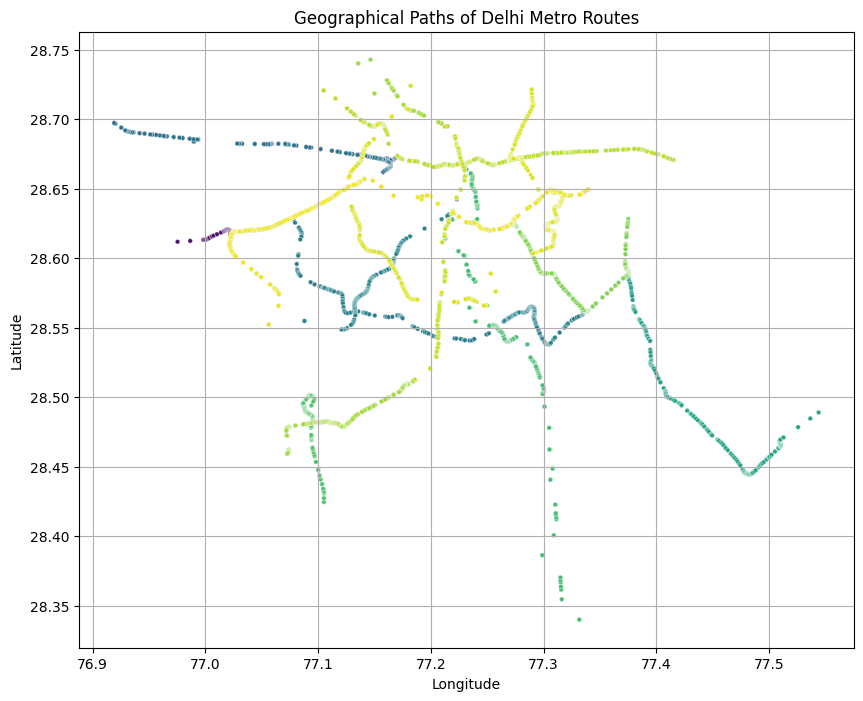

In [27]:
shapes = dfs["shapes"].copy()

# Drop missing values to avoid errors
shapes = shapes.dropna(subset=["shape_pt_lon", "shape_pt_lat"])

# Plot Metro route paths
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='shape_pt_lon', 
    y='shape_pt_lat', 
    hue='shape_id', 
    data=shapes, 
    palette='viridis', 
    s=10, 
    legend=None
)
plt.title('Geographical Paths of Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Examining the frequency and scheduling of trips across different days of the week by analyzing the calendar and trip data:

- The bar chart illustrates the number of tripsscheduled for each day of the week for the Delhi Metro. As we can see, the number of trips from Monday to Friday is consistent, indicating a stable weekday schedule designed to accommodate regular commuter traffic. In contrast, the trips decrease slightly on Saturday and even more on Sunday, reflecting lower demand or a reduced service schedule on weekends.

- This finding suggests that the Delhi Metro strategically scales its operations based on the expected daily ridership, which likely peaks during weekdays due to work and school commutes.

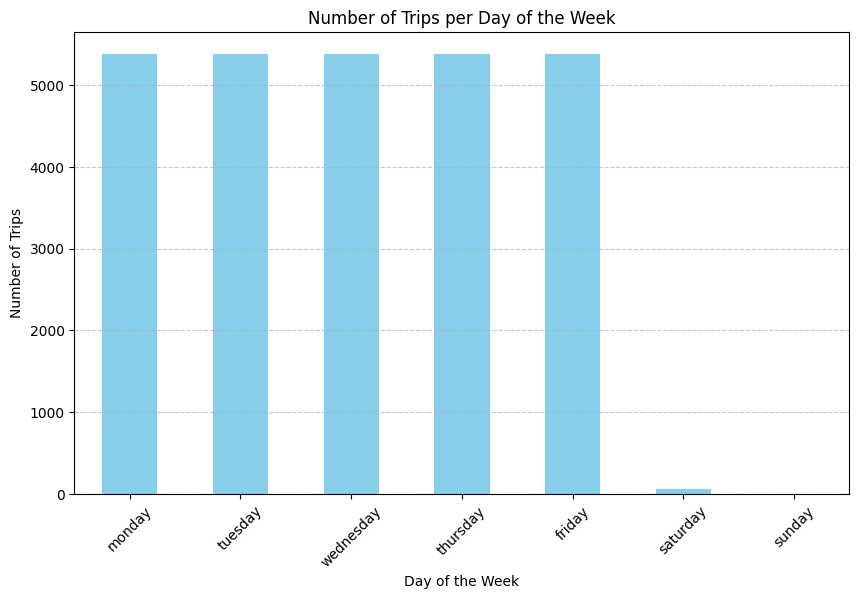

In [28]:
if "trips" in dfs and "calendar" in dfs:
    trips = dfs["trips"].copy()
    calendar = dfs["calendar"].copy()

    # Merge trips with calendar to include the day of operation information
    trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

    # Count the number of trips per day of the week
    trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    trip_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Trips per Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Dataset 'trips' or 'calendar' not found!")

To further analyze the connectivity and effectiveness of the route strategy, I will analyze the distribution and connectivity of stops:

- The scatter plot above shows the geographical distribution of Delhi Metro stops. Each red dot represents a metro stop, and their distribution across the map illustrates how the stops cover different areas of Delhi.

- From the plot, we can see a widespread distribution, suggesting that the Delhi Metro provides good spatial coverage, allowing access to a broad area and facilitating efficient travel across the city.

- The stops are fairly evenly spread, but there are denser clusters, which indicates areas with higher transit needs or central hubs that connect multiple lines.

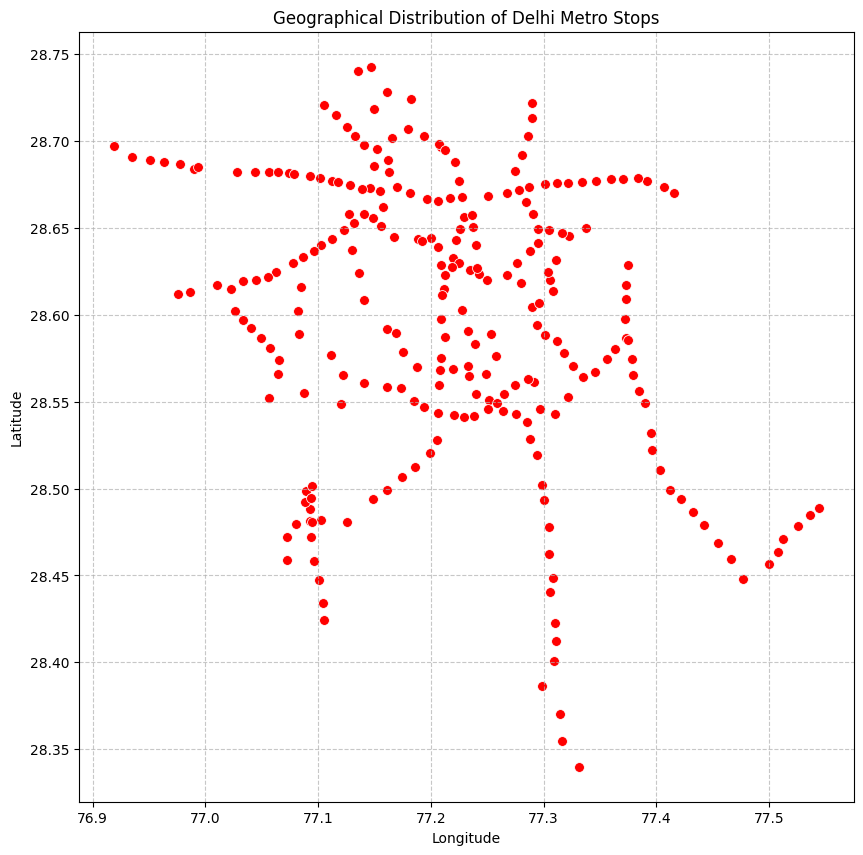

In [29]:
# Check if "stops" dataset exists
if "stops" in dfs:
    stops = dfs["stops"].copy()

    # Plotting the locations of the stops
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='red', s=50, marker='o')
    plt.title('Geographical Distribution of Delhi Metro Stops')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Dataset 'stops' not found!")

Analyzing the route complexity. I will analyze how many routes pass through each stop, which can highlight key transfer points and central hubs within the Delhi Metro network:

The scatter plot above represents the number of routes that pass through each Delhi Metro stop. Stops are visualized in different colours and sizes based on the number of routes they connect, providing insights into the complexity of the network at various locations. Key observations are:

- Hubs and Transfer Points: Larger circles (in warmer colours) indicate stops where multiple routes intersect. These stops serve as major transfer points within the network, facilitating easier cross-city travel for passengers.

- Distribution: Stops with fewer routes, shown in cooler colours and smaller sizes, tend to be more peripheral or on less busy lines. The central areas and more populated zones have stops with greater connectivity.


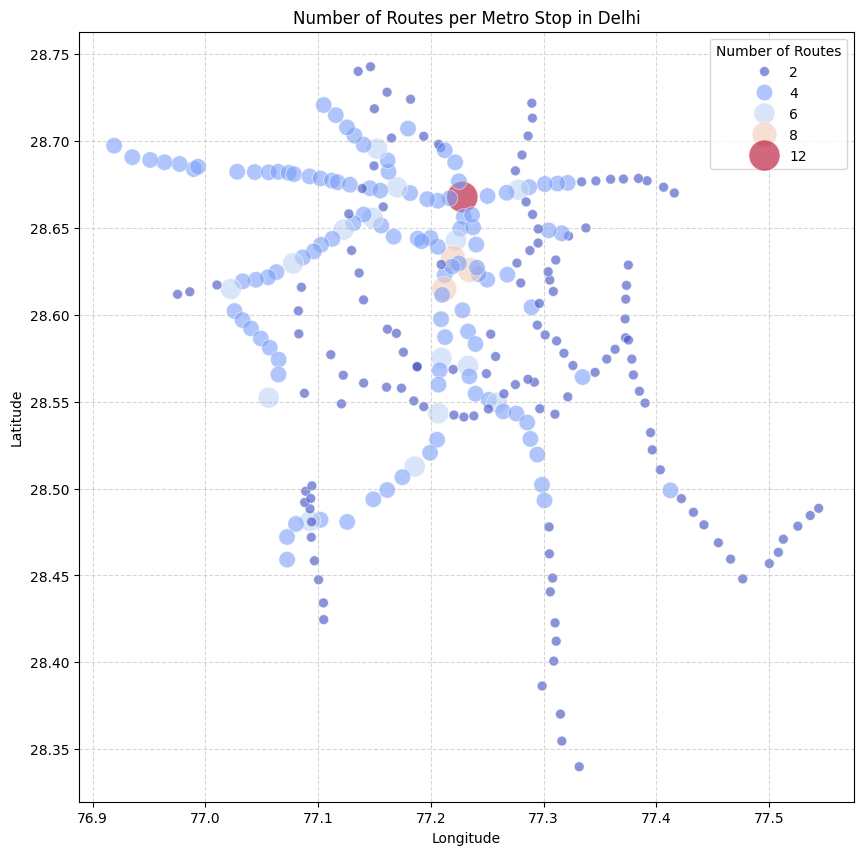

In [30]:
# Ensure all necessary datasets are loaded
if all(name in dfs for name in ["stop_times", "trips", "routes", "stops"]):
    stop_times = dfs["stop_times"].copy()
    trips = dfs["trips"].copy()
    routes = dfs["routes"].copy()
    stops = dfs["stops"].copy()

    # Merge stop_times with trips to link trips to stops, then merge with routes to get route details
    stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

    # Count the number of unique routes per stop
    stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
    stop_route_counts.rename(columns={'route_id': 'number_of_routes'}, inplace=True)

    # Merge with stops dataset to get location information
    stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

    # Plot the number of routes per stop
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                    sizes=(50, 500), alpha=0.6, palette='coolwarm', data=stop_route_counts)
    plt.title('Number of Routes per Metro Stop in Delhi')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Number of Routes', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("One or more required datasets ('stop_times', 'trips', 'routes', 'stops') are missing.")


Analyzing the service frequency by examining the timing intervals between trips during different parts of the day. It will help us understand peak and off-peak operational strategies, which are crucial for managing commuter flow efficiently. Let’s calculate and visualize these intervals:

The bar chart above displays the average interval between trips on the Delhi Metro during different parts of the day: morning, afternoon, and evening. This data provides insight into the service frequency and how it is adjusted based on the expected demand throughout the day. Key findings are:

- Morning: Shorter intervals between trips are observed in the morning hours, which likely corresponds to the morning rush hour when commuters are heading to work or school.

- Afternoon: The intervals increase slightly during the afternoon, which may indicate a reduction in demand after the morning peak.

- Evening: In the evening, intervals decrease again, likely to accommodate the evening rush hour as people return home.



C:\Users\yasha\AppData\Local\Temp\ipykernel_740\3437071527.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
C:\Users\yasha\AppData\Local\Temp\ipykernel_740\3437071527.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')


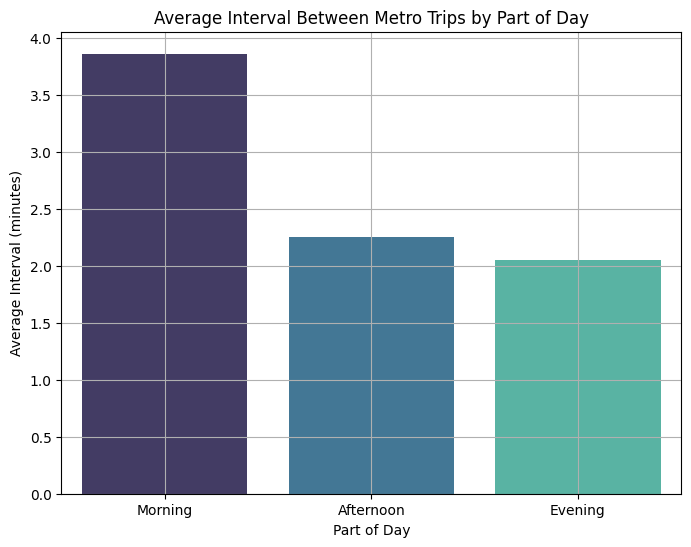

In [31]:
import datetime as dt

# Function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

# Convert arrival_time to datetime
dfs["stop_times"]["arrival_time_dt"] = dfs["stop_times"]["arrival_time"].apply(convert_to_time)

# Sort stop_times to compute arrival intervals
stop_times_sorted = dfs["stop_times"].sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# Function to compute time difference in minutes
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

# Compute interval between arrivals
stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(
    lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# Drop NaN values (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# Categorize intervals by time of day
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)

# Compute average intervals per time of day
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

# Plot the average interval for different times of day
plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Metro Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()


let’s calculate the number of trips and the available capacity per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

- Early Morning: Before 6 AM
- Morning Peak: 6 AM to 10 AM
- Midday: 10 AM to 4 PM
- Evening Peak: 4 PM to 8 PM
- Late Evening: After 8 PM

Midday > Evening > Late Evening > Morning > Early Morning


C:\Users\yasha\AppData\Local\Temp\ipykernel_740\2130260090.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')


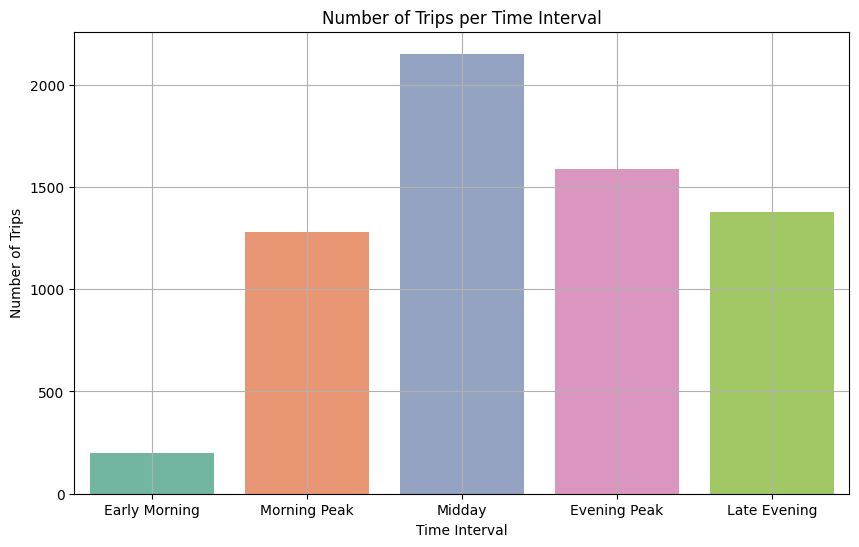

In [32]:
# Define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# Apply time interval classification
dfs["stop_times"]["time_interval"] = dfs["stop_times"]["arrival_time_dt"].apply(classify_time_interval)

# Count the number of trips per time interval
trips_per_interval = dfs["stop_times"].groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# Sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# Plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

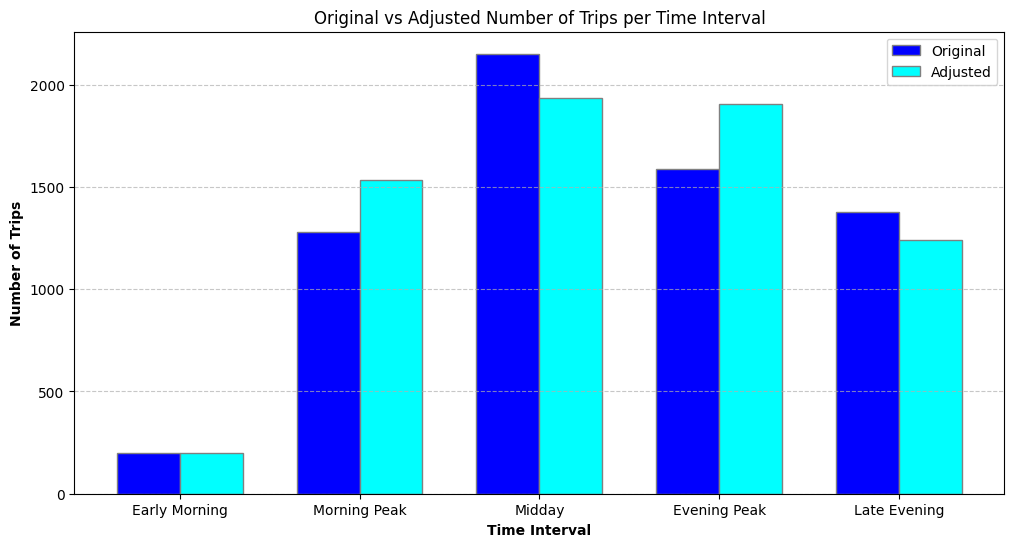

In [33]:
# Copying the original trips per interval data
adjusted_trips_per_interval = trips_per_interval.copy()

# Define adjustment factors for different time intervals
adjustment_factors = {
    'Morning Peak': 1.20,  
    'Evening Peak': 1.20,  
    'Midday': 0.90,  
    'Early Morning': 1.00,  
    'Late Evening': 0.90
}

# Apply adjustments based on predefined factors
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# Plotting Original vs Adjusted Number of Trips per Time Interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = np.arange(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
